In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [6]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Track layers and Hit

## nStations

4mu nStations structure: [[3, 4, 2, 3], [3, 4, 4, 1, 3], [4, 4, 3, ... 4, 4, 3], [4, 3, 4, 3], [4, 3, 3, 4]]
2mu2e nStations structure: [[4, 4], [4, 4], [4, 4, 3], [2, 4], [3, 3, ... 3, 3], [4, 4], [3, 3], [3, 2], [3, 3]]
4mu nStations structure: [[4, 3, 3, 3], [4, 2, 3, 4], [4, 2, 1, 4, ... 4], [4, 4, 4, 3, 0, 1], [2, 3, 3, 2]]
2mu2e nStations structure: [[2, 3], [2, 2], [4, 4], [4, 3], [3, 4], ... 4], [4, 3], [3, 3], [2, 3, 3], [3, 4]]
4mu nStations structure: [[4, 3, 4, 1, 4], [4, 4, 4], [4, 4, 4, 3, ... 4, 1], [3, 3, 4, 3], [2, 4, 4, 4, 3]]
2mu2e nStations structure: [[3, 3], [3, 3], [4, 4], [3, 1], [4, 4, 1, ... 4, 4], [4, 3], [4, 4], [3, 3], [3, 4]]
4mu nStations structure: [[3, 3, 4, 3], [2, 4, 2, 1], [4, 3, 2], ... 2, 1], [4], [3, 4, 4, 2], [3, 4, 3]]
2mu2e nStations structure: [[4, 4], [4, 4], [3], [4], [4, 1, 3], [3, ... [3, 1, 3], [3], [2], [4, 3], [3, 0]]
4mu nStations structure: [[3, 2, 0], [], [2, 3, 3], [3], [3, 3, 4, ... 2, 0], [3, 3, 3, 3], [2, 2, 2], [4, 4]]
2mu2e nSt

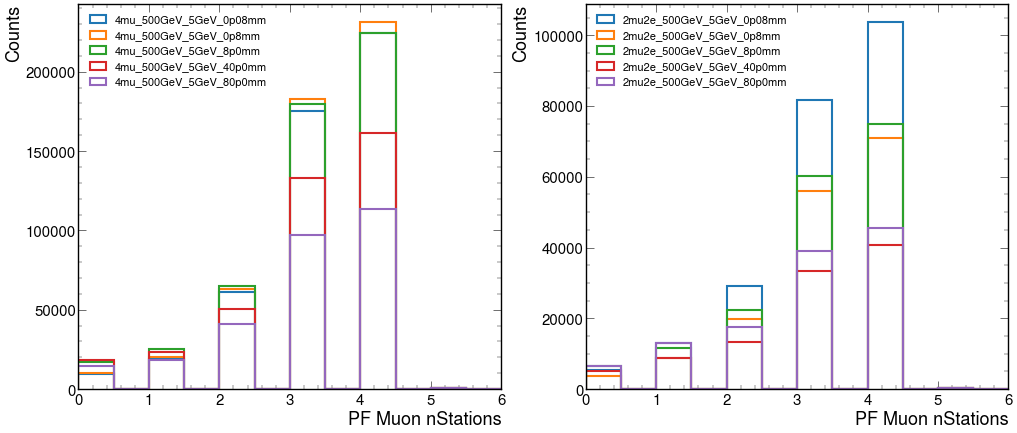

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("nStations", events_4mu[i_4mu].nStations, events_2mu2e[i_2mu].nStations)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].nStations), range=(0,6), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].nStations), range=(0,6), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,6)
ax[1].set_xlim(0,6)
ax[0].set_xlabel('PF Muon nStations')
ax[1].set_xlabel('PF Muon nStations')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/nStations.png", bbox_inches="tight")

## nTrackerLayers

4mu nTrackerLayers structure: [[14, 13, 14, 14], [15, 16, 15, 0, 14], ... [13, 14, 14, 15], [13, 12, 12, 14]]
2mu2e nTrackerLayers structure: [[13, 12], [14, 14], [8, 13, 10], [12, 12, ... 13, 14], [12, 13], [13, 13], [17, 15]]
4mu nTrackerLayers structure: [[11, 11, 6, 12], [14, 14, 14, 14], [11, ... 17, 12, 12, 9, 5, 16], [10, 13, 12, 10]]
2mu2e nTrackerLayers structure: [[14, 14], [11, 11], [13, 13], [9, 11], ... 13, 14], [12, 9], [12, 13, 16], [14, 13]]
4mu nTrackerLayers structure: [[17, 9, 16, 0, 16], [0, 10, 10], [11, 13, ... [9, 11, 12, 9], [5, 13, 6, 8, 13]]
2mu2e nTrackerLayers structure: [[12, 13], [7, 6], [9, 8], [8, 7], [12, ... 9], [6, 0], [0, 10], [12, 14], [11, 11]]
4mu nTrackerLayers structure: [[0, 13, 0, 12], [0, 0, 0, 11], [9, 7, 13], ... 12], [5], [0, 0, 0, 10], [0, 0, 0]]
2mu2e nTrackerLayers structure: [[8, 9], [12, 12], [8], [0], [7, 0, 6], ... [10, 6, 10], [15], [0], [16, 16], [7, 7]]
4mu nTrackerLayers structure: [[0, 0, 4], [], [0, 0, 5], [0], [11, 13, ... 6,

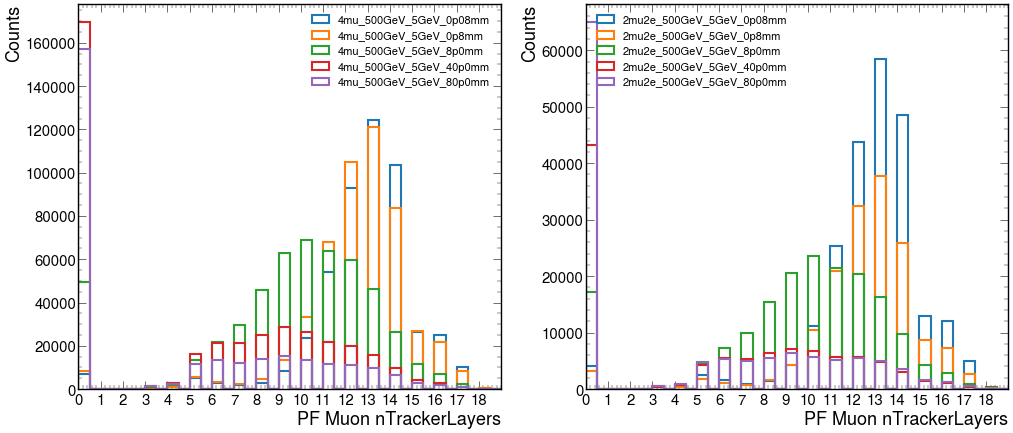

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("nTrackerLayers", events_4mu[i_4mu].nTrackerLayers, events_2mu2e[i_2mu].nTrackerLayers)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].nTrackerLayers), range=(0,19), alpha=1, bins=38, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].nTrackerLayers), range=(0,19), alpha=1, bins=38, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,19)
ax[1].set_xlim(0,19)
ax[0].set_xlabel('PF Muon nTrackerLayers')
ax[1].set_xlabel('PF Muon nTrackerLayers')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
ax[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/nTrackerLayers.png", bbox_inches="tight")

## trkPt

4mu trkPt structure: [[186, 177, 73.8, 65.7], [236, 183, 64.1, ... 96.5, 75.2], [172, 161, 73.8, 33.2]]
2mu2e trkPt structure: [[86.5, 25.5], [239, 6.4], [201, 17.8, 6.03, ... 215, 27.6], [92.2, 56.6], [139, 42]]
4mu trkPt structure: [[129, 99.1, 87.4, 59], [206, 184, 63.1, ... 81.1, 9.4, 3.19], [218, 125, 84.3, 6]]
2mu2e trkPt structure: [[110, 82.6], [257, 6.2], [211, 41.3], ... 105], [167, 83.2, 4.74], [155, 56.8]]
4mu trkPt structure: [[120, 98.7, 50.8, 23.1, 3.51], [404, ... 20.7], [2.13e+03, 132, 106, 76.1, 16.8]]
2mu2e trkPt structure: [[119, 98.3], [140, 123], [169, 17.7], ... [108, 79.1], [47.6, 42.4], [118, 103]]
4mu trkPt structure: [[258, 186, 82.5, 24.3], [544, 194, 127, ... 209, 181, 38.2, 5.32], [137, 43.8, 32]]
2mu2e trkPt structure: [[159, 73.6], [168, 7.38], [99.9], [279, ... 3.07], [54.6], [162, 36.7], [200, 42.3]]
4mu trkPt structure: [[85.5, 16.5, 4.3], [], [598, 197, 103], ... 79.7], [69.7, 68.6, 19.5], [647, 32.2]]
2mu2e trkPt structure: [[222, 28.8, 21.7], [234]

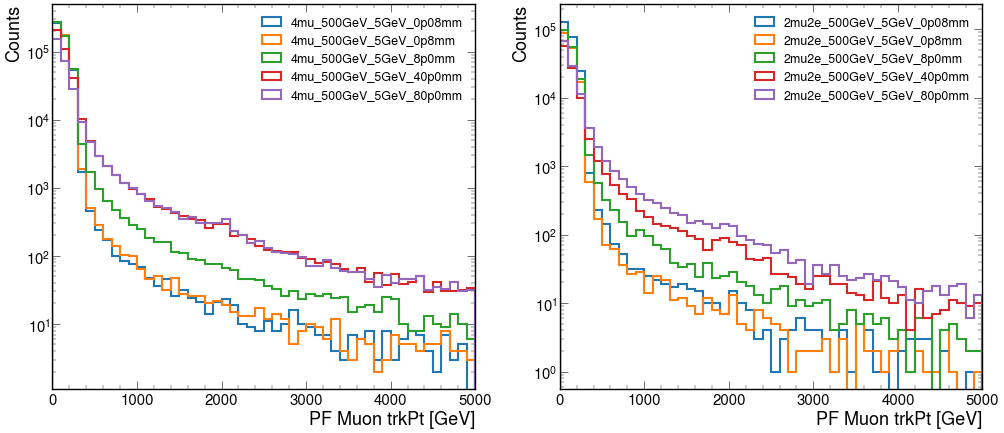

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkPt", events_4mu[i_4mu].trkPt, events_2mu2e[i_2mu].trkPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkPt), range=(0,5000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkPt), range=(0,5000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,5000)
ax[1].set_xlim(0,5000)
ax[0].set_xlabel('PF Muon trkPt [GeV]')
ax[1].set_xlabel('PF Muon trkPt [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/trkPt.png", bbox_inches="tight")

4mu trkPt structure: [[186, 177, 73.8, 65.7], [236, 183, 64.1, ... 96.5, 75.2], [172, 161, 73.8, 33.2]]
2mu2e trkPt structure: [[86.5, 25.5], [239, 6.4], [201, 17.8, 6.03, ... 215, 27.6], [92.2, 56.6], [139, 42]]
4mu trkPt structure: [[129, 99.1, 87.4, 59], [206, 184, 63.1, ... 81.1, 9.4, 3.19], [218, 125, 84.3, 6]]
2mu2e trkPt structure: [[110, 82.6], [257, 6.2], [211, 41.3], ... 105], [167, 83.2, 4.74], [155, 56.8]]
4mu trkPt structure: [[120, 98.7, 50.8, 23.1, 3.51], [404, ... 20.7], [2.13e+03, 132, 106, 76.1, 16.8]]
2mu2e trkPt structure: [[119, 98.3], [140, 123], [169, 17.7], ... [108, 79.1], [47.6, 42.4], [118, 103]]
4mu trkPt structure: [[258, 186, 82.5, 24.3], [544, 194, 127, ... 209, 181, 38.2, 5.32], [137, 43.8, 32]]
2mu2e trkPt structure: [[159, 73.6], [168, 7.38], [99.9], [279, ... 3.07], [54.6], [162, 36.7], [200, 42.3]]
4mu trkPt structure: [[85.5, 16.5, 4.3], [], [598, 197, 103], ... 79.7], [69.7, 68.6, 19.5], [647, 32.2]]
2mu2e trkPt structure: [[222, 28.8, 21.7], [234]

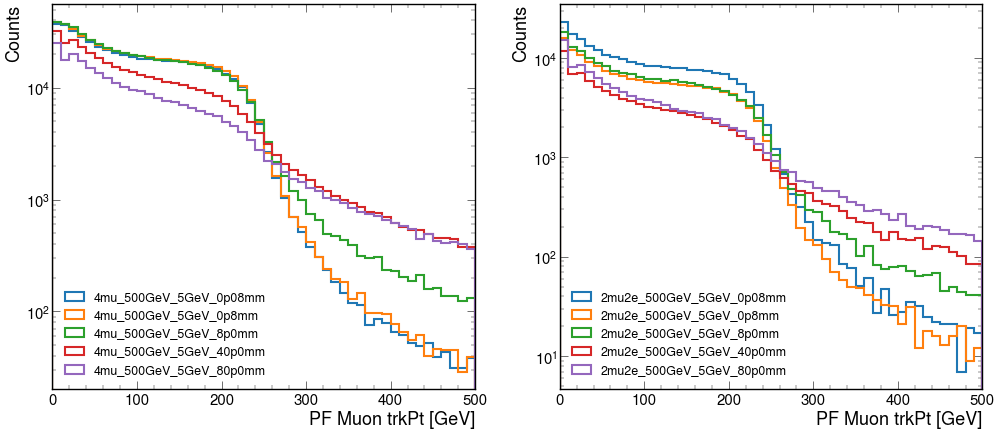

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkPt", events_4mu[i_4mu].trkPt, events_2mu2e[i_2mu].trkPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkPt), range=(0,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkPt), range=(0,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,500)
ax[1].set_xlim(0,500)
ax[0].set_xlabel('PF Muon trkPt [GeV]')
ax[1].set_xlabel('PF Muon trkPt [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18, loc='lower left')
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/trkPt_low.png", bbox_inches="tight")

4mu trkPt structure: [[186, 177, 73.8, 65.7], [236, 183, 64.1, ... 96.5, 75.2], [172, 161, 73.8, 33.2]]
2mu2e trkPt structure: [[86.5, 25.5], [239, 6.4], [201, 17.8, 6.03, ... 215, 27.6], [92.2, 56.6], [139, 42]]
4mu trkPt structure: [[129, 99.1, 87.4, 59], [206, 184, 63.1, ... 81.1, 9.4, 3.19], [218, 125, 84.3, 6]]
2mu2e trkPt structure: [[110, 82.6], [257, 6.2], [211, 41.3], ... 105], [167, 83.2, 4.74], [155, 56.8]]
4mu trkPt structure: [[120, 98.7, 50.8, 23.1, 3.51], [404, ... 20.7], [2.13e+03, 132, 106, 76.1, 16.8]]
2mu2e trkPt structure: [[119, 98.3], [140, 123], [169, 17.7], ... [108, 79.1], [47.6, 42.4], [118, 103]]
4mu trkPt structure: [[258, 186, 82.5, 24.3], [544, 194, 127, ... 209, 181, 38.2, 5.32], [137, 43.8, 32]]
2mu2e trkPt structure: [[159, 73.6], [168, 7.38], [99.9], [279, ... 3.07], [54.6], [162, 36.7], [200, 42.3]]
4mu trkPt structure: [[85.5, 16.5, 4.3], [], [598, 197, 103], ... 79.7], [69.7, 68.6, 19.5], [647, 32.2]]
2mu2e trkPt structure: [[222, 28.8, 21.7], [234]

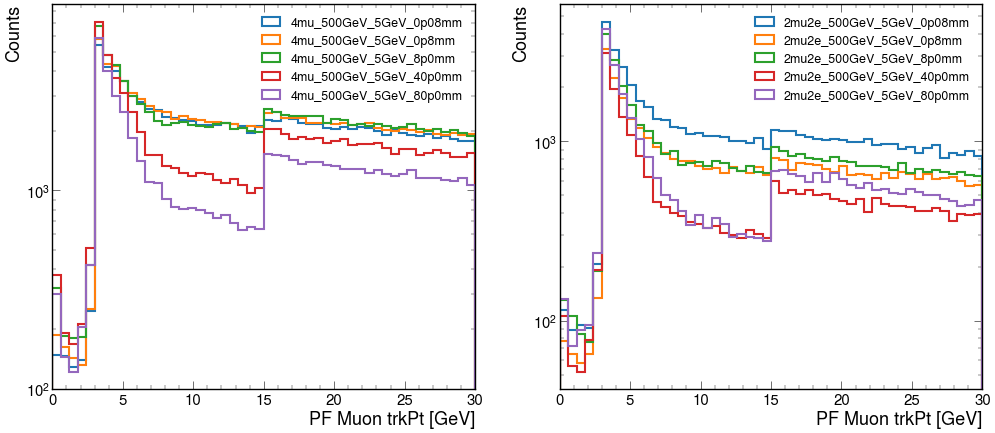

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkPt", events_4mu[i_4mu].trkPt, events_2mu2e[i_2mu].trkPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkPt), range=(0,30), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkPt), range=(0,30), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,30)
ax[1].set_xlim(0,30)
ax[0].set_xlabel('PF Muon trkPt [GeV]')
ax[1].set_xlabel('PF Muon trkPt [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/trkPt_superlow.png", bbox_inches="tight")

## pt - trkPt

4mu pt - trkPt structure: [[1.48, 1.46, 0, 0], [-4, -0.305, ... -0.327, -0.177], [1.05, -0.575, 0, -0.0419]]
2mu2e pt - trkPt structure: [[-1.06, 0.0188], [-0.00117, -0.00464], ... [-0.365, 0.0282], [1.38, 0.0352]]
4mu pt - trkPt structure: [[1.94, 0.423, -0.901, 0], [-0.00981, -0.68, ... 0.139], [0.00591, -0.149, 0, -1.82]]
2mu2e pt - trkPt structure: [[0, -0.496], [-11, 0.00428], [-0.151, ... [-0.437, -0.64, 0.014], [1.1, 0.00579]]
4mu pt - trkPt structure: [[0.393, 0, 0, 0, 0.0529], [0, -0.00061, ... 0.017], [0, 1.31, -7.65, -2.36, 0.012]]
2mu2e pt - trkPt structure: [[0.32, 0], [-0.87, -13.9], [7.43, ... 0.356], [0.29, -0.0279], [9.87, -0.068]]
4mu pt - trkPt structure: [[0, 0, 0, 1.11], [0, 0, 0, 0.045], ... -0.000122], [0, 0, 0, 0.0336], [0, 0, 0]]
2mu2e pt - trkPt structure: [[3.12, -0.128], [-0.271, -0.004], [19.4], ... [0], [0.26, 0.0888], [-0.00203, 5.02]]
4mu pt - trkPt structure: [[0, 0, -0.000826], [], [0, 0, -10.5], [0], ... [0, 0, 0, -50.9], [0, 0, 0], [0, 0]]
2mu2e pt -

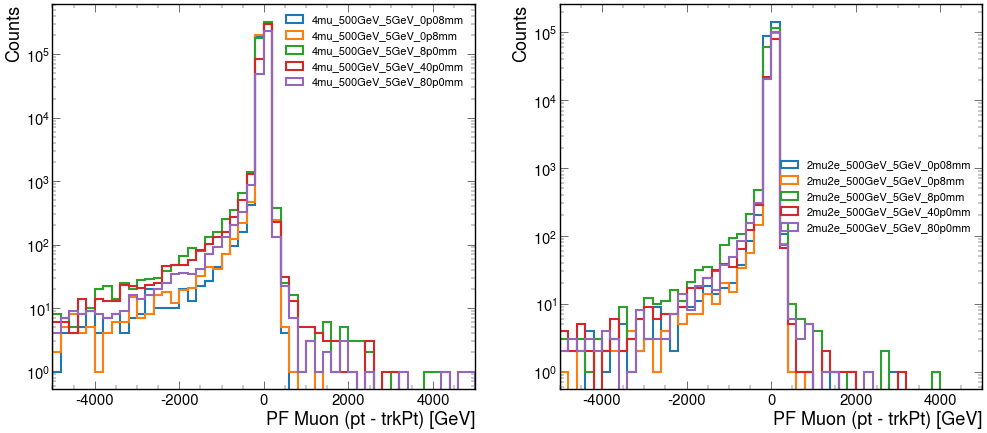

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt - trkPt", events_4mu[i_4mu].pt - events_4mu[i_4mu].trkPt, events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].trkPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt - events_4mu[i_4mu].trkPt), range=(-5000,5000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].trkPt), range=(-5000,5000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-5000,5000)
ax[1].set_xlim(-5000,5000)
ax[0].set_xlabel('PF Muon (pt - trkPt) [GeV]')
ax[1].set_xlabel('PF Muon (pt - trkPt) [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/pt-trkPt.png", bbox_inches="tight")

4mu pt - trkPt structure: [[1.48, 1.46, 0, 0], [-4, -0.305, ... -0.327, -0.177], [1.05, -0.575, 0, -0.0419]]
2mu2e pt - trkPt structure: [[-1.06, 0.0188], [-0.00117, -0.00464], ... [-0.365, 0.0282], [1.38, 0.0352]]
4mu pt - trkPt structure: [[1.94, 0.423, -0.901, 0], [-0.00981, -0.68, ... 0.139], [0.00591, -0.149, 0, -1.82]]
2mu2e pt - trkPt structure: [[0, -0.496], [-11, 0.00428], [-0.151, ... [-0.437, -0.64, 0.014], [1.1, 0.00579]]
4mu pt - trkPt structure: [[0.393, 0, 0, 0, 0.0529], [0, -0.00061, ... 0.017], [0, 1.31, -7.65, -2.36, 0.012]]
2mu2e pt - trkPt structure: [[0.32, 0], [-0.87, -13.9], [7.43, ... 0.356], [0.29, -0.0279], [9.87, -0.068]]
4mu pt - trkPt structure: [[0, 0, 0, 1.11], [0, 0, 0, 0.045], ... -0.000122], [0, 0, 0, 0.0336], [0, 0, 0]]
2mu2e pt - trkPt structure: [[3.12, -0.128], [-0.271, -0.004], [19.4], ... [0], [0.26, 0.0888], [-0.00203, 5.02]]
4mu pt - trkPt structure: [[0, 0, -0.000826], [], [0, 0, -10.5], [0], ... [0, 0, 0, -50.9], [0, 0, 0], [0, 0]]
2mu2e pt -

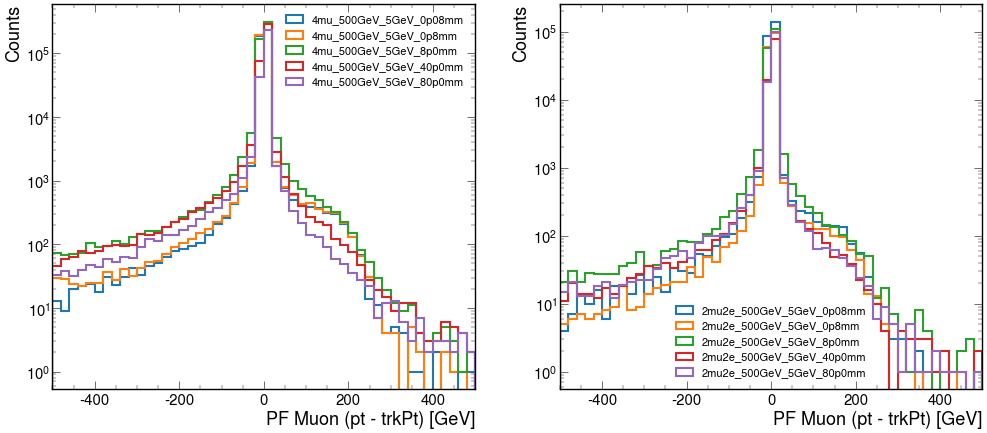

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt - trkPt", events_4mu[i_4mu].pt - events_4mu[i_4mu].trkPt, events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].trkPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt - events_4mu[i_4mu].trkPt), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].trkPt), range=(-500,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-500,500)
ax[1].set_xlim(-500,500)
ax[0].set_xlabel('PF Muon (pt - trkPt) [GeV]')
ax[1].set_xlabel('PF Muon (pt - trkPt) [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/pt-trkPt_low.png", bbox_inches="tight")

4mu pt - trkPt structure: [[1.48, 1.46, 0, 0], [-4, -0.305, ... -0.327, -0.177], [1.05, -0.575, 0, -0.0419]]
2mu2e pt - trkPt structure: [[-1.06, 0.0188], [-0.00117, -0.00464], ... [-0.365, 0.0282], [1.38, 0.0352]]
4mu pt - trkPt structure: [[1.94, 0.423, -0.901, 0], [-0.00981, -0.68, ... 0.139], [0.00591, -0.149, 0, -1.82]]
2mu2e pt - trkPt structure: [[0, -0.496], [-11, 0.00428], [-0.151, ... [-0.437, -0.64, 0.014], [1.1, 0.00579]]
4mu pt - trkPt structure: [[0.393, 0, 0, 0, 0.0529], [0, -0.00061, ... 0.017], [0, 1.31, -7.65, -2.36, 0.012]]
2mu2e pt - trkPt structure: [[0.32, 0], [-0.87, -13.9], [7.43, ... 0.356], [0.29, -0.0279], [9.87, -0.068]]
4mu pt - trkPt structure: [[0, 0, 0, 1.11], [0, 0, 0, 0.045], ... -0.000122], [0, 0, 0, 0.0336], [0, 0, 0]]
2mu2e pt - trkPt structure: [[3.12, -0.128], [-0.271, -0.004], [19.4], ... [0], [0.26, 0.0888], [-0.00203, 5.02]]
4mu pt - trkPt structure: [[0, 0, -0.000826], [], [0, 0, -10.5], [0], ... [0, 0, 0, -50.9], [0, 0, 0], [0, 0]]
2mu2e pt -

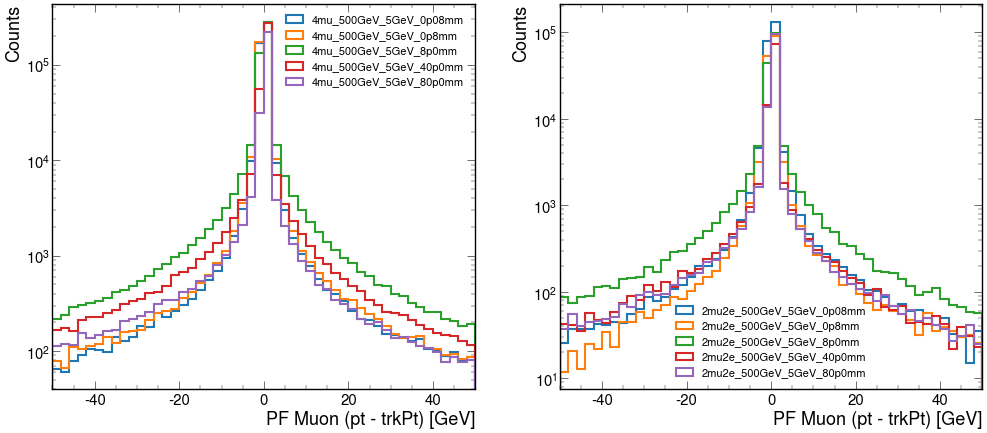

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt - trkPt", events_4mu[i_4mu].pt - events_4mu[i_4mu].trkPt, events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].trkPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt - events_4mu[i_4mu].trkPt), range=(-50,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].trkPt), range=(-50,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-50,50)
ax[1].set_xlim(-50,50)
ax[0].set_xlabel('PF Muon (pt - trkPt) [GeV]')
ax[1].set_xlabel('PF Muon (pt - trkPt) [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/pt-trkPt_superlow.png", bbox_inches="tight")

## trkNumPlanes

4mu trkNumPlanes structure: [[3, 4, 0, 0], [1, 3, 4, 0, 4], [4, 4, 3, ... 4, 4, 3], [4, 3, 4, 4], [4, 3, 0, 4]]
2mu2e trkNumPlanes structure: [[3, 4], [4, 3], [2, 4, 3], [0, 4], [0, 3, ... 4, 4], [4, 4], [3, 3], [2, 2], [4, 4]]
4mu trkNumPlanes structure: [[4, 3, 4, 0], [4, 3, 3, 4], [0, 0, 4, 1, ... 4], [4, 0, 0, 0, 4, 3], [3, 3, 0, 2]]
2mu2e trkNumPlanes structure: [[0, 3], [2, 3], [4, 4], [3, 2], [4, 4], ... 4], [4, 3], [3, 4], [3, 3, 3], [3, 4]]
4mu trkNumPlanes structure: [[4, 3, 0, 2, 4], [4, 4, 4], [4, 4, 4, 3, ... 4, 0], [3, 0, 4, 4], [0, 3, 4, 4, 4]]
2mu2e trkNumPlanes structure: [[3, 0], [2, 2], [3, 4], [0, 3], [4, 4, 0, ... 4, 0], [4, 4], [4, 4], [4, 3], [3, 4]]
4mu trkNumPlanes structure: [[3, 0, 4, 4], [3, 4, 3, 3], [4, 3, 4], ... 0, 0], [4], [3, 4, 4, 4], [3, 4, 3]]
2mu2e trkNumPlanes structure: [[4, 4], [4, 4], [3], [4], [2, 0, 3], [3, ... [3, 0, 4], [2], [3], [4, 4], [4, 2]]
4mu trkNumPlanes structure: [[4, 2, 3], [], [2, 3, 4], [3], [4, 3, 4, ... 2, 4], [3, 4, 4, 4], [

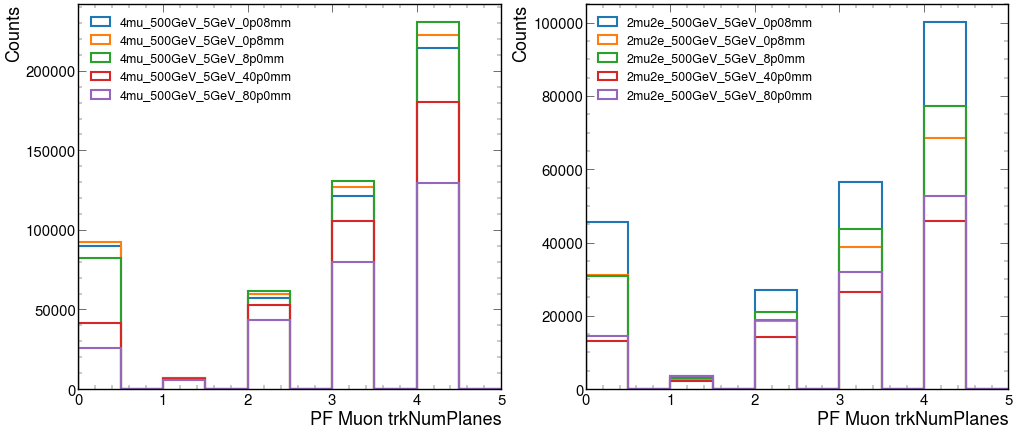

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumPlanes", events_4mu[i_4mu].trkNumPlanes, events_2mu2e[i_2mu].trkNumPlanes)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumPlanes), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumPlanes), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,5)
ax[1].set_xlim(0,5)
ax[0].set_xlabel('PF Muon trkNumPlanes')
ax[1].set_xlabel('PF Muon trkNumPlanes')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/trkNumPlanes.png", bbox_inches="tight")

## trkNumHits

4mu trkNumHits structure: [[25, 33, 0, 0], [18, 30, 19, 0, 30], ... 32], [25, 36, 49, 15], [49, 40, 0, 48]]
2mu2e trkNumHits structure: [[16, 24], [49, 29], [27, 27, 21], [0, 34, ... 47, 33], [33, 31], [34, 21], [24, 24]]
4mu trkNumHits structure: [[15, 18, 36, 0], [45, 22, 36, 49], [0, ... [25, 0, 0, 0, 26, 21], [16, 26, 0, 27]]
2mu2e trkNumHits structure: [[0, 23], [10, 27], [46, 50], [31, 25], ... 40], [33, 39], [26, 27, 17], [34, 39]]
4mu trkNumHits structure: [[24, 34, 0, 14, 24], [39, 49, 49], [48, ... [39, 0, 26, 31], [0, 18, 47, 25, 24]]
2mu2e trkNumHits structure: [[34, 0], [33, 27], [28, 48], [0, 27], ... [19, 20], [36, 32], [20, 18], [34, 40]]
4mu trkNumHits structure: [[23, 0, 39, 11], [12, 39, 15, 29], [48, ... [49], [32, 25, 28, 47], [17, 22, 18]]
2mu2e trkNumHits structure: [[35, 35], [50, 46], [24], [47], [21, 0, ... 0, 36], [8], [15], [24, 20], [25, 26]]
4mu trkNumHits structure: [[35, 12, 24], [], [18, 33, 47], [28], ... [24, 42, 42, 35], [22, 6, 27], [45, 18]]
2mu2e 

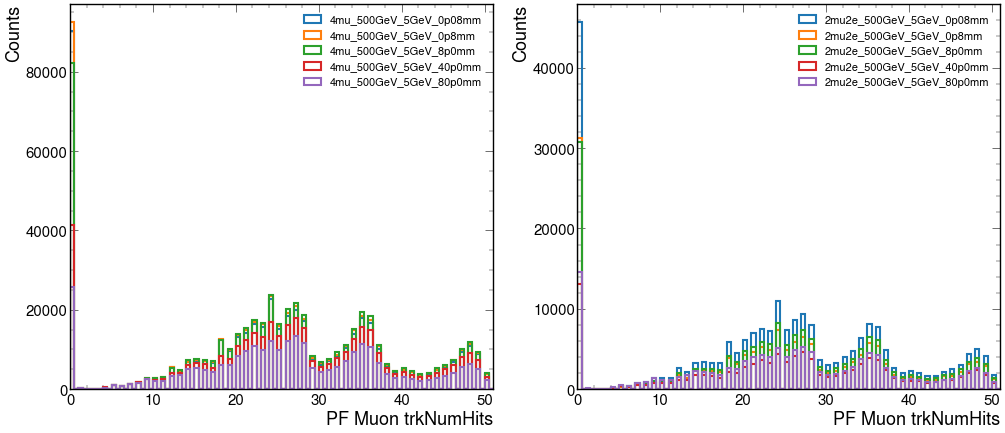

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumHits", events_4mu[i_4mu].trkNumHits, events_2mu2e[i_2mu].trkNumHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumHits), range=(0,51), alpha=1, bins=102, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumHits), range=(0,51), alpha=1, bins=102, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,51)
ax[1].set_xlim(0,51)
ax[0].set_xlabel('PF Muon trkNumHits')
ax[1].set_xlabel('PF Muon trkNumHits')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/trkNumHits.png", bbox_inches="tight")

## trkNumDTHits

4mu trkNumDTHits structure: [[21, 28, 0, 0], [0, 0, 0, 0, 0], [12, ... 43, 28], [0, 32, 44, 0], [43, 36, 0, 42]]
2mu2e trkNumDTHits structure: [[0, 0], [43, 26], [16, 23, 0], [0, 30], ... [42, 28], [30, 28], [23, 12], [0, 0]]
4mu trkNumDTHits structure: [[0, 15, 31, 0], [39, 18, 31, 44], [0, 0, ... [0, 0, 0, 0, 0, 0], [12, 22, 0, 23]]
2mu2e trkNumDTHits structure: [[0, 19], [7, 22], [41, 44], [12, 15], ... 44, 35], [29, 34], [22, 22, 0], [31, 35]]
4mu trkNumDTHits structure: [[0, 31, 0, 12, 0], [33, 44, 44], [42, 34, ... 0], [35, 0, 0, 28], [0, 0, 43, 20, 0]]
2mu2e trkNumDTHits structure: [[30, 0], [23, 23], [24, 42], [0, 22], ... [0, 0], [32, 27], [0, 0], [31, 35]]
4mu trkNumDTHits structure: [[19, 0, 34, 0], [8, 34, 12, 24], [42, 19, 0, ... [43], [28, 0, 0, 41], [0, 0, 0]]
2mu2e trkNumDTHits structure: [[29, 29], [44, 41], [0], [41], [12, 0, 12, ... 0, 32], [0], [10], [0, 0], [20, 23]]
4mu trkNumDTHits structure: [[30, 0, 12], [], [15, 30, 42], [23], ... [20, 36, 36, 30], [18, 4, 23]

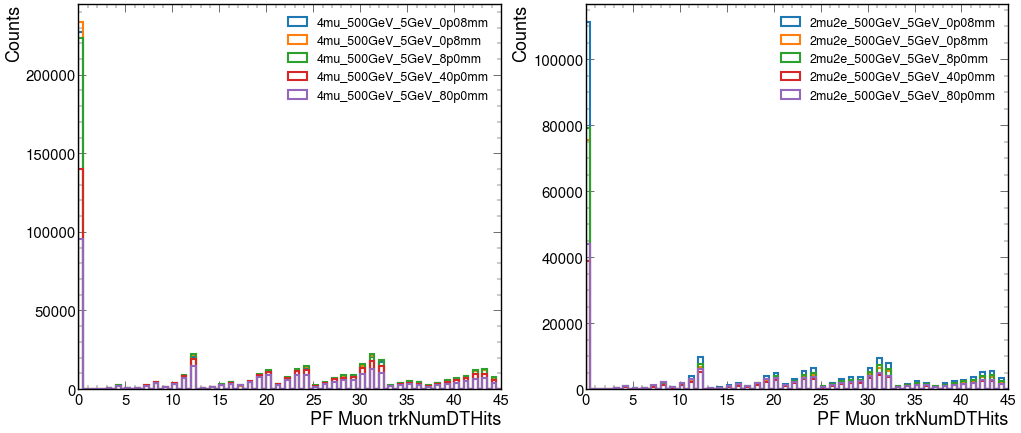

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumDTHits", events_4mu[i_4mu].trkNumDTHits, events_2mu2e[i_2mu].trkNumDTHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumDTHits), range=(0,45), alpha=1, bins=90, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumDTHits), range=(0,45), alpha=1, bins=90, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,45)
ax[1].set_xlim(0,45)
ax[0].set_xlabel('PF Muon trkNumDTHits')
ax[1].set_xlabel('PF Muon trkNumDTHits')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/trkNumDTHits.png", bbox_inches="tight")

## trkNumCSCHits

4mu trkNumCSCHits structure: [[0, 0, 0, 0], [18, 30, 18, 0, 28], [0, 0, ... 0, 0], [21, 0, 0, 12], [0, 0, 0, 0]]
2mu2e trkNumCSCHits structure: [[16, 24], [0, 0], [6, 0, 18], [0, 0], [0, ... 0], [0, 0], [0, 0], [6, 6], [20, 20]]
4mu trkNumCSCHits structure: [[12, 0, 0, 0], [0, 0, 0, 0], [0, 0, 10, ... [22, 0, 0, 0, 22, 18], [0, 0, 0, 0]]
2mu2e trkNumCSCHits structure: [[0, 0], [0, 0], [0, 0], [15, 6], [0, 0], ... 0], [0, 0], [0, 0], [0, 0, 16], [0, 0]]
4mu trkNumCSCHits structure: [[23, 0, 0, 0, 24], [0, 0, 0], [0, 0, 0, ... 0], [0, 0, 24, 0], [0, 18, 0, 0, 24]]
2mu2e trkNumCSCHits structure: [[0, 0], [6, 0], [0, 0], [0, 0], [0, 0, ... 0], [15, 17], [0, 0], [18, 15], [0, 0]]
4mu trkNumCSCHits structure: [[0, 0, 0, 9], [0, 0, 0, 0], [0, 0, 16], ... 0], [0], [0, 22, 24, 0], [17, 22, 18]]
2mu2e trkNumCSCHits structure: [[0, 0], [0, 0], [21], [0], [6, 0, 12], ... [0, 0, 0], [6], [0], [21, 18], [0, 0]]
4mu trkNumCSCHits structure: [[0, 11, 9], [], [0, 0, 0], [0], [18, 0, ... 23], [0, 0, 0, 

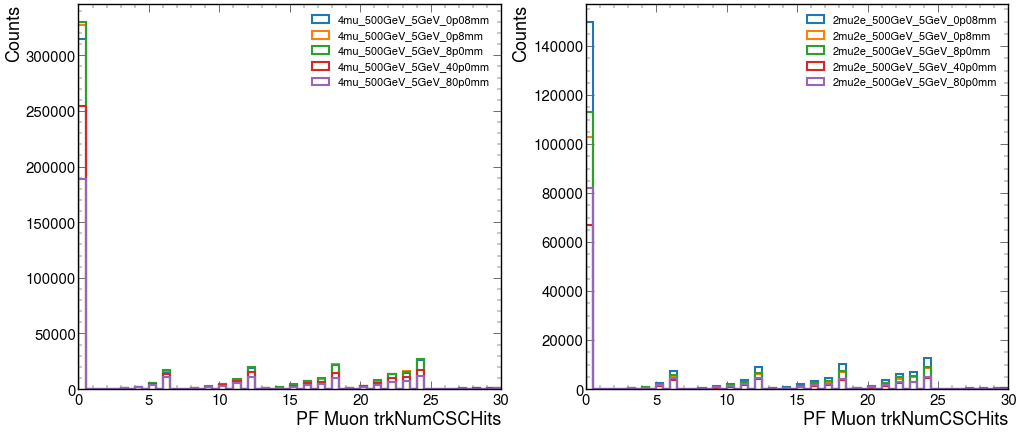

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumCSCHits", events_4mu[i_4mu].trkNumCSCHits, events_2mu2e[i_2mu].trkNumCSCHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumCSCHits), range=(0,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumCSCHits), range=(0,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,30)
ax[1].set_xlim(0,30)
ax[0].set_xlabel('PF Muon trkNumCSCHits')
ax[1].set_xlabel('PF Muon trkNumCSCHits')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/trkNumCSCHits.png", bbox_inches="tight")

## trkNumPixelHits

4mu trkNumPixelHits structure: [[4, 3, 4, 4], [4, 7, 8, -1, 3], [3, 4, 2, ... 3, 2, 3], [3, 4, 4, 4], [4, 3, 3, 5]]
2mu2e trkNumPixelHits structure: [[7, 5], [4, 4], [2, 4, 2], [3, 3], [4, 5, ... 4, 4], [4, 4], [3, 4], [4, 5], [5, 3]]
4mu trkNumPixelHits structure: [[5, 2, 0, 5], [5, 4, 4, 4], [3, 4, 0, 3, ... 4], [5, 3, 2, 3, 1, 4], [1, 4, 4, 1]]
2mu2e trkNumPixelHits structure: [[4, 4], [2, 2], [5, 3], [3, 3], [4, 4], ... 3], [4, 4], [4, 3], [3, 5, 6], [4, 3]]
4mu trkNumPixelHits structure: [[7, 1, 7, -1, 7], [-1, 0, 0], [1, 3, 1, 2, ... 6, 6], [0, 0, 0, 0], [1, 4, 0, 0, 4]]
2mu2e trkNumPixelHits structure: [[3, 3], [0, 0], [0, 0], [0, 0], [3, 3, ... 0, 0], [0, -1], [-1, 0], [0, 1], [1, 1]]
4mu trkNumPixelHits structure: [[-1, 1, -1, 0], [-1, -1, -1, 4], [0, 0, ... [2], [-1, -1, -1, 3], [-1, -1, -1]]
2mu2e trkNumPixelHits structure: [[0, 1], [4, 3], [0], [-1], [0, -1, 0], ... [0, 0, 0], [4], [-1], [4, 5], [0, 0]]
4mu trkNumPixelHits structure: [[-1, -1, 2], [], [-1, -1, 0], [-1], ...

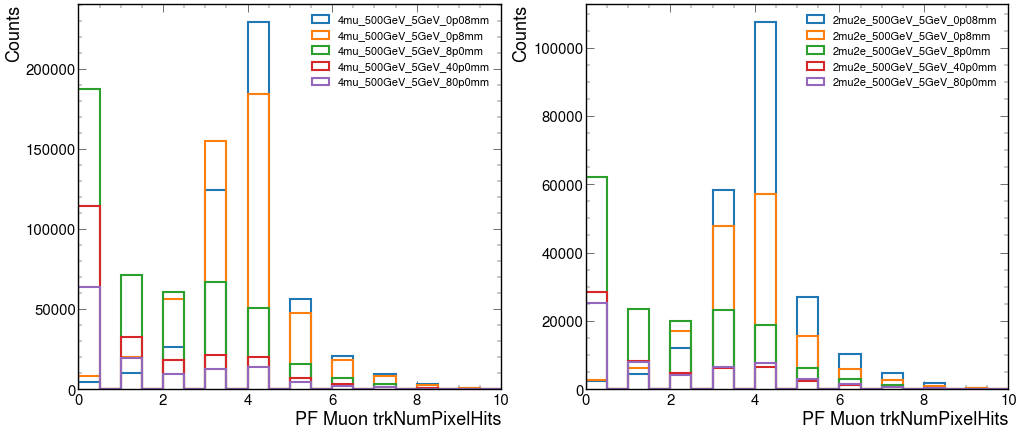

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumPixelHits", events_4mu[i_4mu].trkNumPixelHits, events_2mu2e[i_2mu].trkNumPixelHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumPixelHits), range=(0,10), alpha=1, bins=20, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumPixelHits), range=(0,10), alpha=1, bins=20, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,10)
ax[1].set_xlim(0,10)
ax[0].set_xlabel('PF Muon trkNumPixelHits')
ax[1].set_xlabel('PF Muon trkNumPixelHits')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/trkNumPixelHits.png", bbox_inches="tight")

## trkNumTrkLayers

4mu trkNumTrkLayers structure: [[14, 13, 14, 14], [15, 16, 15, -1, 14], ... [13, 14, 14, 15], [13, 12, 12, 14]]
2mu2e trkNumTrkLayers structure: [[13, 12], [14, 14], [8, 13, 10], [12, 12, ... 13, 14], [12, 13], [13, 13], [17, 15]]
4mu trkNumTrkLayers structure: [[11, 11, 6, 12], [14, 14, 14, 14], [11, ... 17, 12, 12, 9, 5, 16], [10, 13, 12, 10]]
2mu2e trkNumTrkLayers structure: [[14, 14], [11, 11], [13, 13], [9, 11], ... 13, 14], [12, 9], [12, 13, 16], [14, 13]]
4mu trkNumTrkLayers structure: [[17, 9, 16, -1, 16], [-1, 10, 10], [11, ... [9, 11, 12, 9], [5, 13, 6, 8, 13]]
2mu2e trkNumTrkLayers structure: [[12, 13], [7, 6], [9, 8], [8, 7], [12, ... [6, -1], [-1, 10], [12, 14], [11, 11]]
4mu trkNumTrkLayers structure: [[-1, 13, -1, 12], [-1, -1, -1, 11], [9, 7, ... [5], [-1, -1, -1, 10], [-1, -1, -1]]
2mu2e trkNumTrkLayers structure: [[8, 9], [12, 12], [8], [-1], [7, -1, 6, ... 6, 10], [15], [-1], [16, 16], [7, 7]]
4mu trkNumTrkLayers structure: [[-1, -1, 4], [], [-1, -1, 5], [-1], ... [-

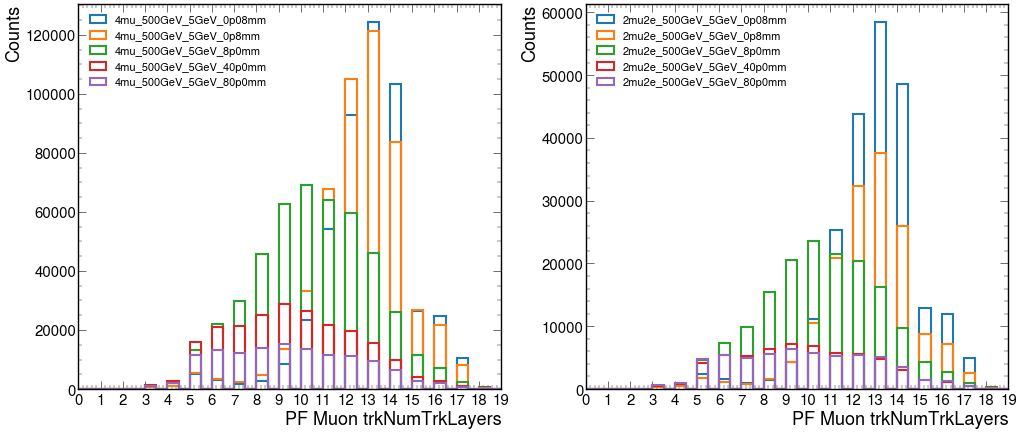

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumTrkLayers", events_4mu[i_4mu].trkNumTrkLayers, events_2mu2e[i_2mu].trkNumTrkLayers)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumTrkLayers), range=(0,19), alpha=1, bins=38, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumTrkLayers), range=(0,19), alpha=1, bins=38, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,19)
ax[1].set_xlim(0,19)
ax[0].set_xlabel('PF Muon trkNumTrkLayers')
ax[1].set_xlabel('PF Muon trkNumTrkLayers')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
ax[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.savefig("../Plots/V2/PF_MUON/Track_and_hits/trkNumTrkLayers.png", bbox_inches="tight")